In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.io import imread, imshow
import cv2

%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import defaultdict

import warnings
warnings.filterwarnings("ignore")

from subprocess import check_output
import glob

import PIL
from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
#https://www.kaggle.com/philschmidt/cervix-eda-model-selection
#https://www.researchgate.net/publication/24041301_Automatic_Detection_of_Anatomical_Landmarks_in_Uterine_Cervix_Images

In [42]:
#Setting each path to the folders for each type of cervix
basepath = "/Users/keerat/dev/AOSResearch/resources/Train/"
path_type1 = "/Users/keerat/dev/AOSResearch/resources/Train/Type_1"
path_type2 = "/Users/keerat/dev/AOSResearch/resources/Train/Type_2"
path_type3 = "/Users/keerat/dev/AOSResearch/resources/Train/Type_3"
paths = [path_type1, path_type2, path_type3]

#glob will sort through each folder(Type 1, 2, 3) and return the information in it as a list
type1_cervix_images = glob.glob("/Users/keerat/dev/AOSResearch/resources/Train/Type_1/*.jpg")
type2_cervix_images = glob.glob("/Users/keerat/dev/AOSResearch/resources/Train/Type_2/*.jpg")
type3_cervix_images = glob.glob("/Users/keerat/dev/AOSResearch/resources/Train/Type_3/*.jpg")

#all_cervix_images holds all the data
all_cervix_images = type1_cervix_images + type2_cervix_images + type3_cervix_images

#checking the number of each cervix type 
print("The number of Type 1 cervices is {}.".format((len(type1_cervix_images))))
print("The number of Type 2 cervices is {}.".format((len(type2_cervix_images))))
print("The number of Type 3 cervices is {}.".format((len(type3_cervix_images))))
print("The total number of all cervices is {}.".format((len(all_cervix_images))))

#The data has been transported inton a dataframe
all_cervix_images = pd.DataFrame({'imagepath': all_cervix_images})
all_cervix_images['filetype'] = all_cervix_images.apply(lambda row: row.imagepath.split(".")[-1], axis=1)
all_cervix_images['type'] = all_cervix_images.apply(lambda row: row.imagepath.split("/")[-2], axis=1)
all_cervix_images.head()

The number of Type 1 cervices is 248.
The number of Type 2 cervices is 780.
The number of Type 3 cervices is 450.
The total number of all cervices is 1478.


,imagepath,filetype,type
0,/Users/keerat/dev/AOSResearch/resources/Train/...,jpg,Type_1
1,/Users/keerat/dev/AOSResearch/resources/Train/...,jpg,Type_1
2,/Users/keerat/dev/AOSResearch/resources/Train/...,jpg,Type_1
3,/Users/keerat/dev/AOSResearch/resources/Train/...,jpg,Type_1
4,/Users/keerat/dev/AOSResearch/resources/Train/...,jpg,Type_1


In [43]:
sizes = []
sizes_files = []
for filepath in all_cervix_images['imagepath']:
    if(Image.open(filepath).size not in sizes):
        sizes.append(Image.open(filepath).size)
        sizes_files.append(filepath)
for a in sizes_files:
    print(type(a))
    print(Image.open(a).size)

<class 'str'>
(3264, 3917)
<class 'str'>
(3120, 4160)
<class 'str'>
(2340, 4160)
<class 'str'>
(3264, 2448)


In [70]:
#3264 = max width
#4160 = max height
changed_size = []
print("Original Sizes (rows, columns)")
for t in sizes_files:
    print(Image.open(t).size)
    if (Image.open(t).size[1] % 2 == 1):
        top = (int)((4160 - Image.open(t).size[1])/2 + 1)
        bottom = (int)((4160 - Image.open(t).size[1])/2)
        left = (int)((3264 - Image.open(t).size[0])/2)
        right = (int)((3264 - Image.open(t).size[0])/2)
    elif (Image.open(t).size[0] % 2 == 1):
        top = (int)((4160 - Image.open(t).size[1])/2)
        bottom = (int)((4160 - Image.open(t).size[1])/2)
        left = (int)((3264 - Image.open(t).size[0])/2 + 1)
        right = (int)((3264 - Image.open(t).size[0])/2)
    else:
        top = (int)((4160 - Image.open(t).size[1])/2)
        bottom = (int)((4160 - Image.open(t).size[1])/2)
        left = (int)((3264 - Image.open(t).size[0])/2)
        right = (int)((3264 - Image.open(t).size[0])/2)
    #changed_size.append(cv2.copyMakeBorder( cv2.imread(t), top, bottom, left, right, cv2.BORDER_CONSTANT))
    changed_size.append(cv2.copyMakeBorder( cv2.imread(t), top, bottom, left, right, cv2.BORDER_CONSTANT, value = [0,0,0]))
print("Zero-padded sizes (columns, rows)")    
for a in changed_size:
    print(np.shape(a))

Original Sizes (rows, columns)
(3264, 3917)
(3120, 4160)
(2340, 4160)
(3264, 2448)
Zero-padded sizes (columns, rows)
(4160, 3264, 3)
(4160, 3264, 3)
(4160, 3264, 3)
(4160, 3264, 3)


<class 'numpy.ndarray'>
/Users/keerat/dev/AOSResearch/resources/Train/Type_1/0.jpg


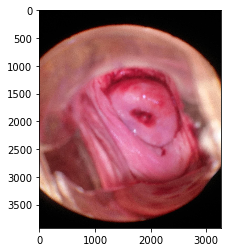

In [63]:
plt.imshow(plt.imread(sizes_files[0]))
print(type(plt.imread(sizes_files[0])))
print(sizes_files[0])

<class 'numpy.ndarray'>


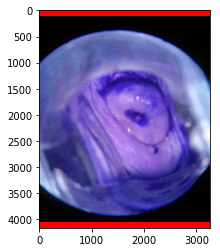

In [64]:
plt.imshow(changed_size[0])
print(type(changed_size[0]))

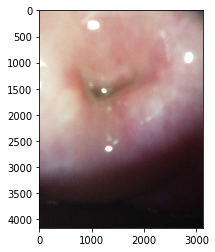

In [65]:
plt.imshow(plt.imread(sizes_files[1]))

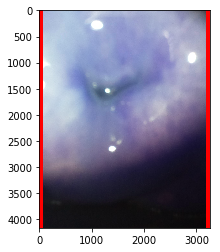

In [66]:
plt.imshow(changed_size[1])

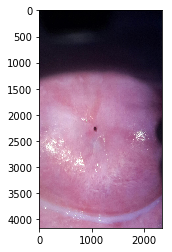

In [67]:
plt.imshow(plt.imread(sizes_files[2]))

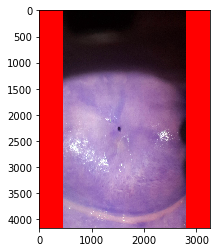

In [68]:
plt.imshow(changed_size[2])

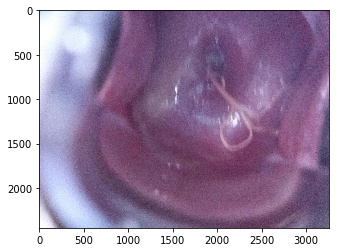

In [69]:
plt.imshow(plt.imread(sizes_files[3]))

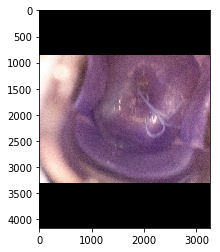

In [55]:
plt.imshow(changed_size[3])

In [49]:
print(plt.imread(sizes_files[0])[0])
for i in range(360):
    if (plt.imread(sizes_files[0]))[i].all() == changed_size[0][i].all():
        print('M: {}'.format(i))
    else:
        print(('NM: {}'.format(i)))

[[0 0 0]
 [0 0 0]
 [0 0 0]
 ..., 
 [0 0 0]
 [0 0 0]
 [0 0 0]]
M: 0
M: 1
M: 2
M: 3
M: 4
M: 5
M: 6
M: 7
M: 8
M: 9
M: 10
M: 11
M: 12
M: 13
M: 14
M: 15
M: 16
M: 17
M: 18
M: 19
M: 20
M: 21
M: 22
M: 23
M: 24
M: 25
M: 26
M: 27
M: 28
M: 29
M: 30
M: 31
M: 32
M: 33
M: 34
M: 35
M: 36
M: 37
M: 38
M: 39
M: 40
M: 41
M: 42
M: 43
M: 44
M: 45
M: 46
M: 47
M: 48
M: 49
M: 50
M: 51
M: 52
M: 53
M: 54
M: 55
M: 56
M: 57
M: 58
M: 59
M: 60
M: 61
M: 62
M: 63
M: 64
M: 65
M: 66
M: 67
M: 68
M: 69
M: 70
M: 71
M: 72
M: 73
M: 74
M: 75
M: 76
M: 77
M: 78
M: 79
M: 80
M: 81
M: 82
M: 83
M: 84
M: 85
M: 86
M: 87
M: 88
M: 89
M: 90
M: 91
M: 92
M: 93
M: 94
M: 95
M: 96
M: 97
M: 98
M: 99
M: 100
M: 101
M: 102
M: 103
M: 104
M: 105
M: 106
M: 107
M: 108
M: 109
M: 110
M: 111
M: 112
M: 113
M: 114
M: 115
M: 116
M: 117
M: 118
M: 119
M: 120
M: 121
M: 122
M: 123
M: 124
M: 125
M: 126
M: 127
M: 128
M: 129
M: 130
M: 131
M: 132
M: 133
M: 134
M: 135
M: 136
M: 137
M: 138
M: 139
M: 140
M: 141
M: 142
M: 143
M: 144
M: 145
M: 146
M: 147
M: 148
M: 14

In [58]:
print(plt.imread(sizes_files[0])[0])
for i in range(360):
    if (plt.imread(sizes_files[0]))[i].all() != changed_size[0][i].all():
        print('NM: {}'.format(i))
    else:
        print(('M: {}'.format(i)))

[[0 0 0]
 [0 0 0]
 [0 0 0]
 ..., 
 [0 0 0]
 [0 0 0]
 [0 0 0]]
M: 0
M: 1
M: 2
M: 3
M: 4
M: 5
M: 6
M: 7
M: 8
M: 9
M: 10
M: 11
M: 12
M: 13
M: 14
M: 15
M: 16
M: 17
M: 18
M: 19
M: 20
M: 21
M: 22
M: 23
M: 24
M: 25
M: 26
M: 27
M: 28
M: 29
M: 30
M: 31
M: 32
M: 33
M: 34
M: 35
M: 36
M: 37
M: 38
M: 39
M: 40
M: 41
M: 42
M: 43
M: 44
M: 45
M: 46
M: 47
M: 48
M: 49
M: 50
M: 51
M: 52
M: 53
M: 54
M: 55
M: 56
M: 57
M: 58


IndexError: too many indices for array